<p style="background-color:#3ab1c8;font-family:Cursive;font-size:200%;color:black;text-align:center;border-radius:120px 20px;padding:20px;margin:20px;"><b>Deep_Learning Notebook_03-Batch_168</b></p>

<p style="font-family:Cursive;font-size:100%;color:black;text-align:center;border-radius:10px 10px;"><b>by Nash</b></p>

<b style="font-family:Cursive;font-size:100%;color:black;text-align:right;border-radius:10px 10px;">Follow me [Linkedin](www.linkedin.com/in/nash-n-sungur-333869289) | [Git Hub](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0)</b>

# Classification

<span class="girk">We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.</span>

Churn analiz demek datayi iki gruba ayirmak icin kullanilir. daimi musteri, ayrilma ihtimali olan musteriler. hasta hücreler, saglikli hücreler gibi gibi

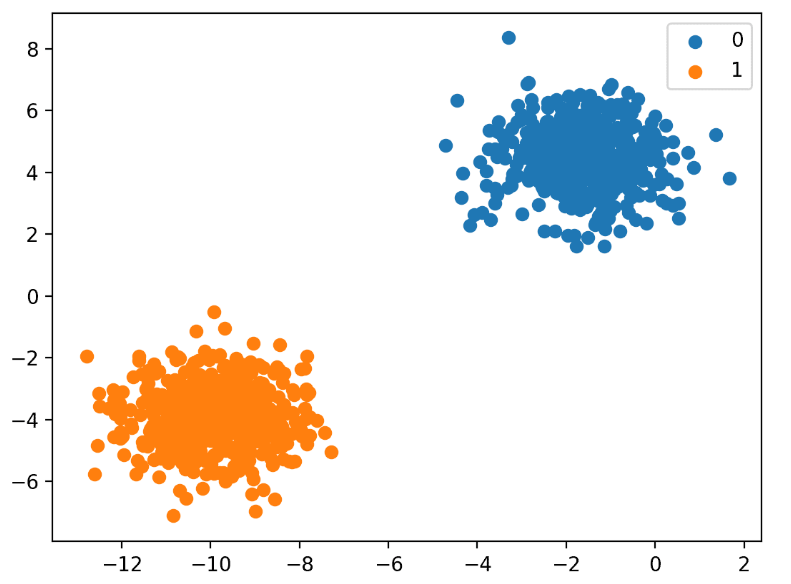

## Import  libraries & data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

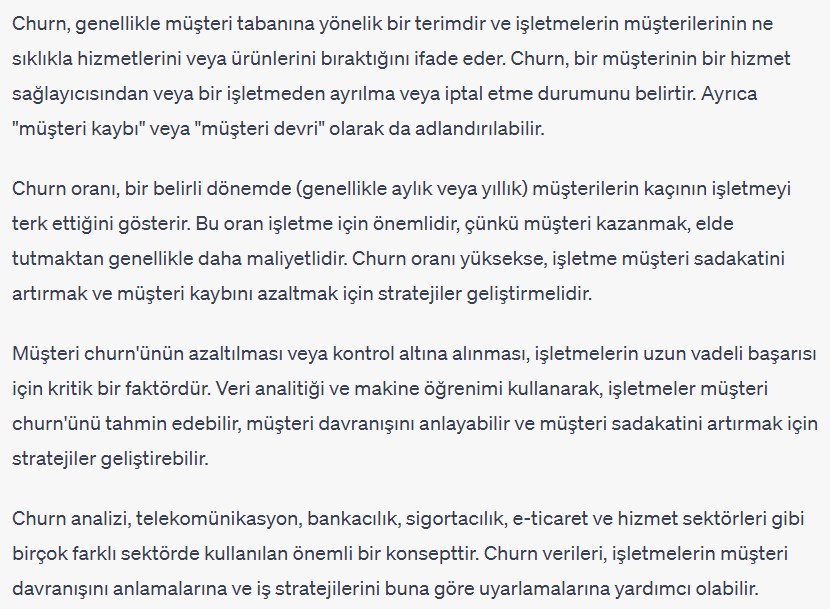

In [3]:
df = pd.read_csv("Churn_Modelling.csv", index_col='RowNumber')
df.head()
#Tenure:Number of years for which the customer has been with the bank
#NumOfProducts :Number of bank products the customer is utilising
#Binary flag 1 if the customer closed account with bank and 0 if the customer is retained
#"RowNumber" sütunu indeks olarak belirleniyor

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


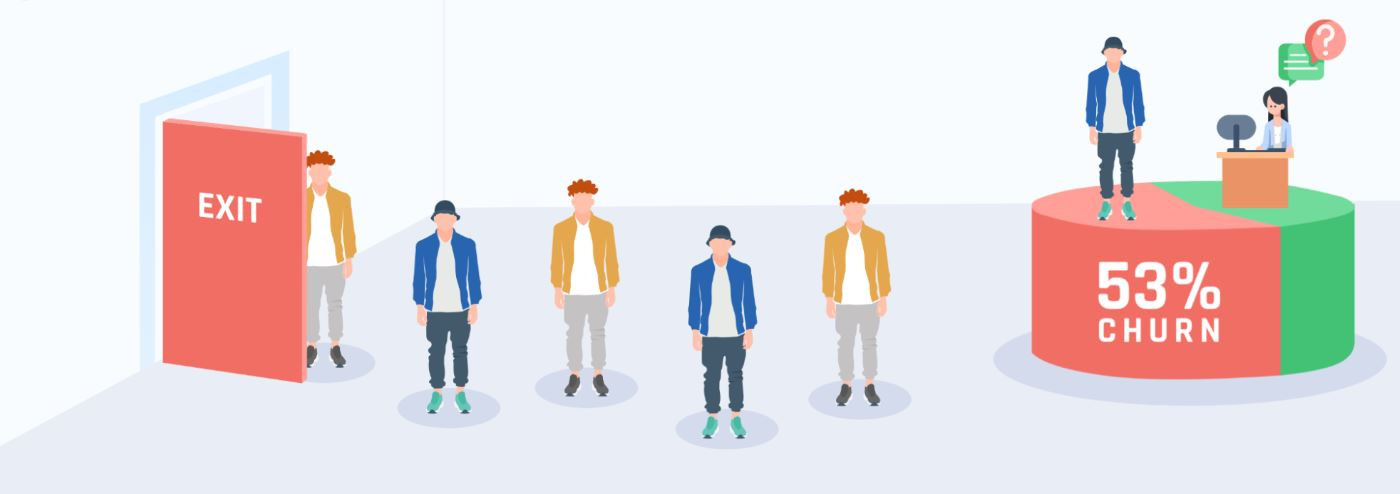

## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df.shape

(10000, 13)

In [6]:
df.isnull().sum().any()

False

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
Exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000


In [9]:
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

0    7963
1    2037
Name: Exited, dtype: int64


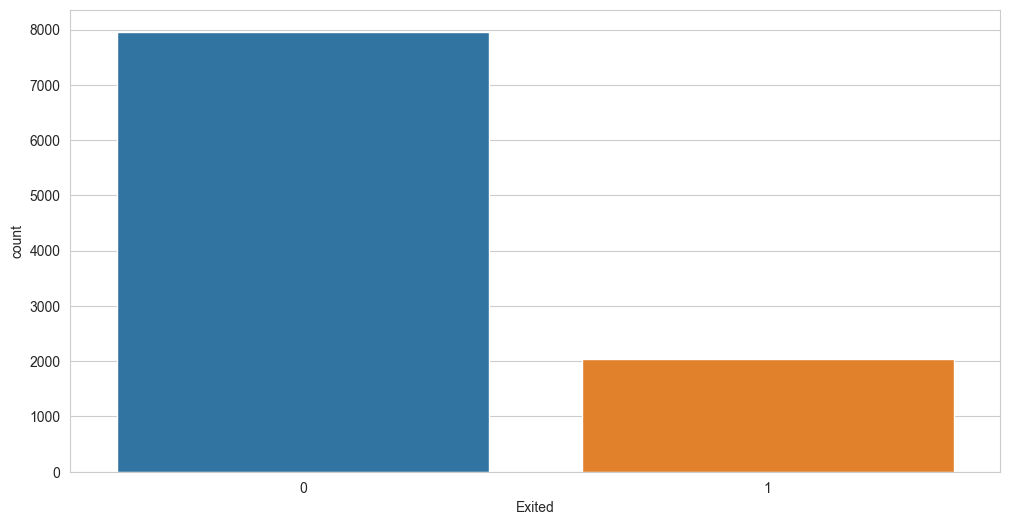

In [10]:
print(df.Exited.value_counts())
sns.countplot(df["Exited"]);

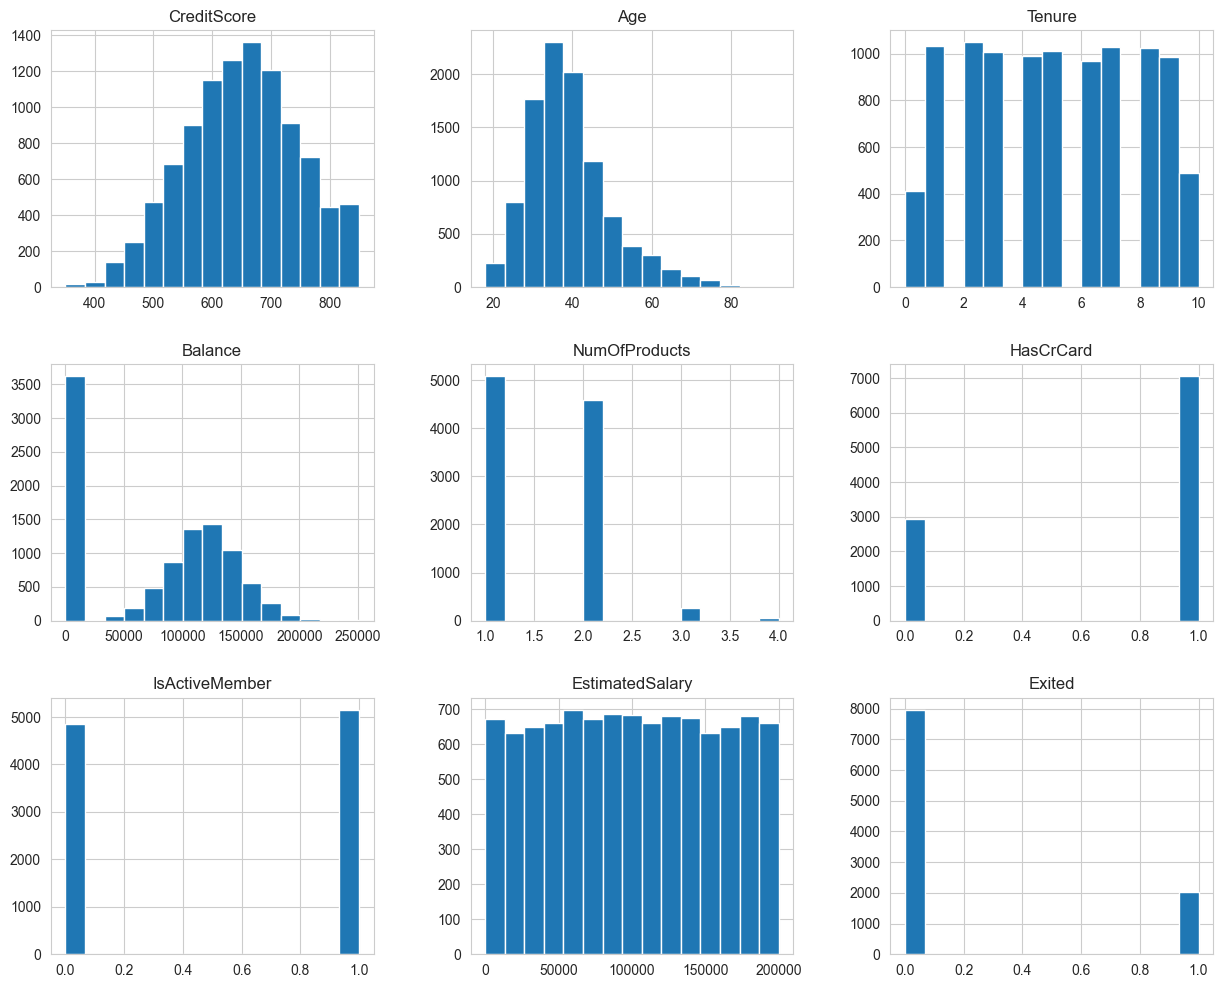

In [11]:
df.hist(figsize=(15, 12), bins=15);

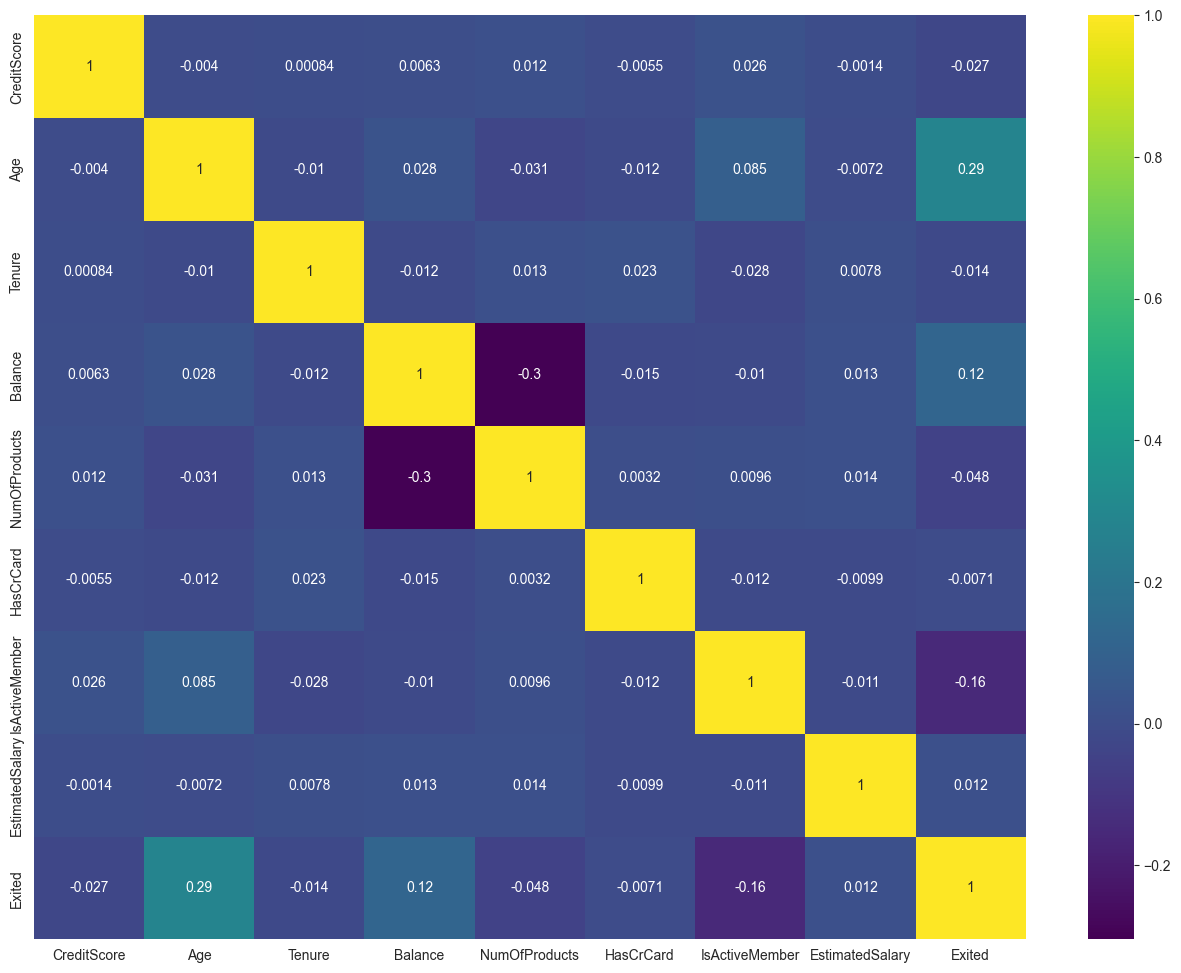

In [12]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='viridis');

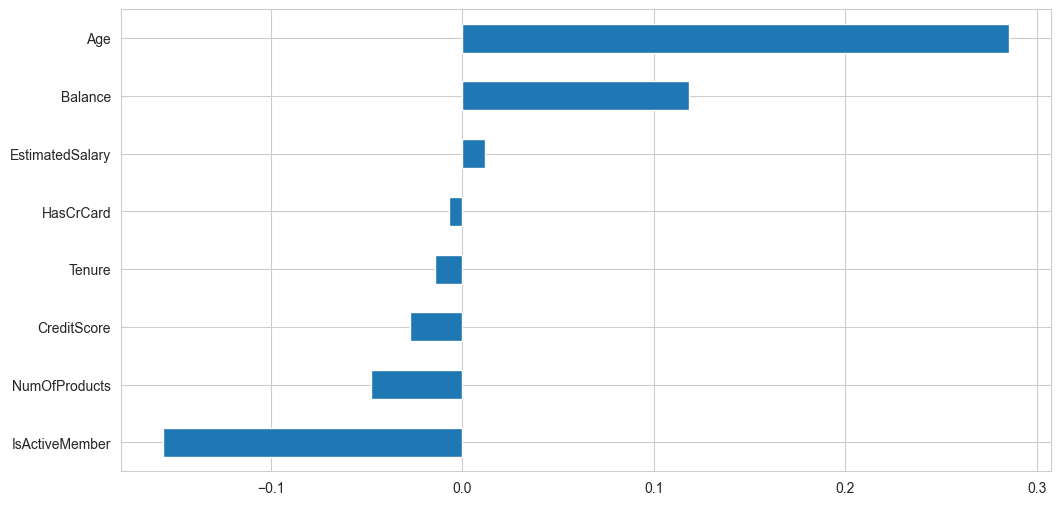

In [13]:
df.corr()['Exited'][:-1].sort_values().plot.barh();

In [14]:
# from sklearn.preprocessing import OrdinalEncoder

# encoder = OrdinalEncoder()
# encoded_columns = encoder.fit_transform(df[['Geography', 'Gender']])

# df[['Geography', 'Gender']] = encoded_columns'
df = pd.get_dummies(df, drop_first=True)

df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,,
1,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
2,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
3,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
4,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
5,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0


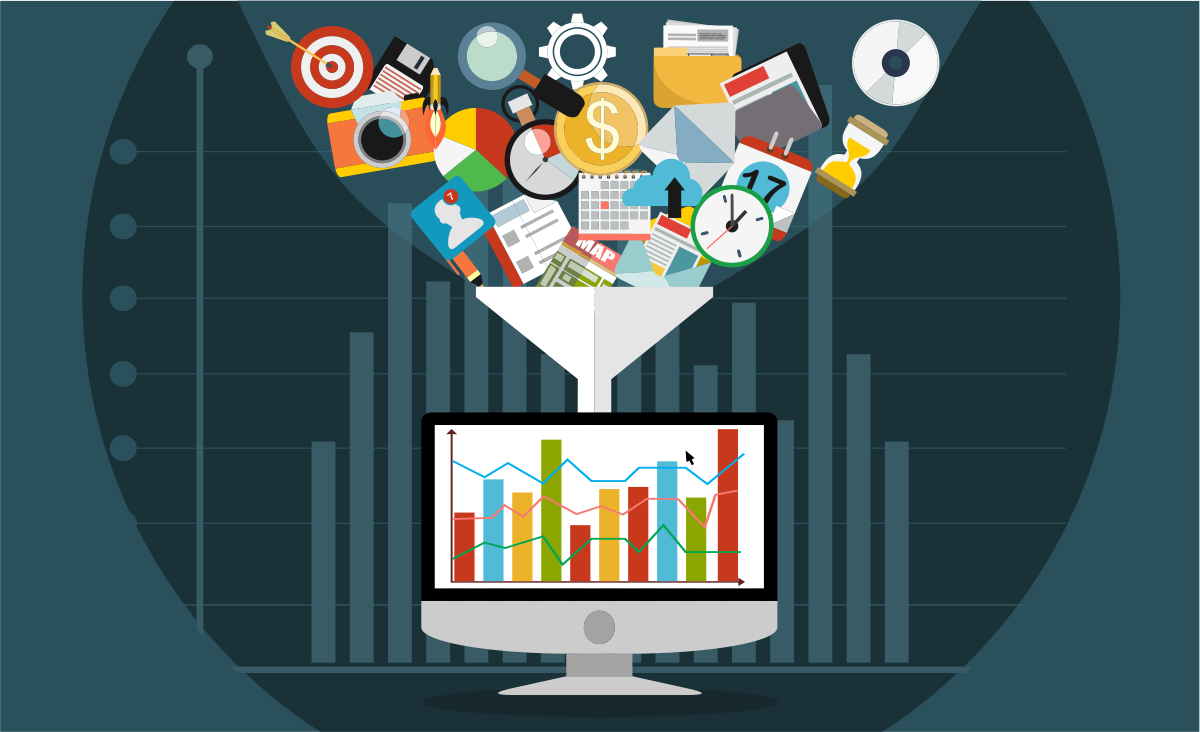

## Preprocessing of Data

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [16]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.1,
                                                    random_state=seed)


In [17]:
scaler = MinMaxScaler()

In [18]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

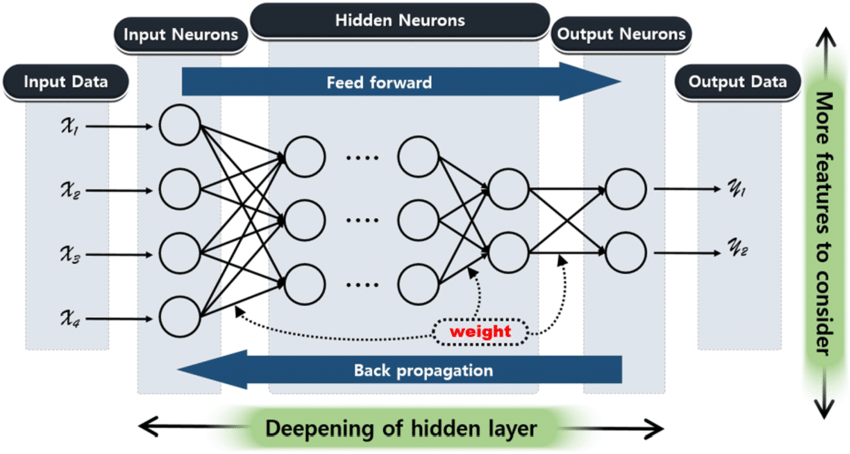

## Modelling & Model Performance

### without class_weigth

In [19]:
X_train.shape

(9000, 11)

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [21]:
from tensorflow.keras.optimizers import Adam

In [22]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(16, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.002)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])
# Recall — the percentage of positive cases you caught
# Recall, false negative’in gözardı edilemez olduğu durumlarda önemli bir metrik. recall = TP / TP +FN
# Recall’a bakma sebebimiz tamamiyle paydadaki false negative’ler, yani hesabına devam ettiği tahmin edilen ve hesabını kapatan insanlar. 



In [23]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=90)

In [24]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=32,
          epochs=500,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/500


254/254 [==============================] - 4s 5ms/step - loss: 0.5219 - recall: 0.1973 - val_loss: 0.4760 - val_recall: 0.0000e+00
Epoch 2/500
254/254 [==============================] - 1s 4ms/step - loss: 0.4122 - recall: 0.2942 - val_loss: 0.3508 - val_recall: 0.5414
Epoch 3/500
254/254 [==============================] - 1s 4ms/step - loss: 0.3858 - recall: 0.3868 - val_loss: 0.3233 - val_recall: 0.4530
Epoch 4/500
254/254 [==============================] - 1s 4ms/step - loss: 0.3774 - recall: 0.3783 - val_loss: 0.3138 - val_recall: 0.5083
Epoch 5/500
254/254 [==============================] - 1s 4ms/step - loss: 0.3685 - recall: 0.4268 - val_loss: 0.3200 - val_recall: 0.6298
Epoch 6/500
254/254 [==============================] - 1s 4ms/step - loss: 0.3642 - recall: 0.4201 - val_loss: 0.3048 - val_recall: 0.5193
Epoch 7/500
254/254 [==============================] - 1s 4ms/step - loss: 0.3665 - recall: 0.4171 - val_loss: 0.3216 - val_recall: 0.6464
Epoch 8/500
254/254 [

254/254 [==============================] - 1s 4ms/step - loss: 0.2899 - recall: 0.5684 - val_loss: 0.3378 - val_recall: 0.5635
Epoch 115/500
254/254 [==============================] - 1s 4ms/step - loss: 0.2907 - recall: 0.5636 - val_loss: 0.3391 - val_recall: 0.5691
Epoch 116/500
254/254 [==============================] - 1s 4ms/step - loss: 0.2901 - recall: 0.5611 - val_loss: 0.3483 - val_recall: 0.6077
Epoch 117/500
254/254 [==============================] - 1s 4ms/step - loss: 0.2917 - recall: 0.5593 - val_loss: 0.3496 - val_recall: 0.6243
Epoch 118/500
254/254 [==============================] - 1s 4ms/step - loss: 0.2901 - recall: 0.5630 - val_loss: 0.3503 - val_recall: 0.5414
Epoch 119/500
254/254 [==============================] - 1s 4ms/step - loss: 0.2902 - recall: 0.5599 - val_loss: 0.3725 - val_recall: 0.5746
Epoch 120/500
254/254 [==============================] - 1s 4ms/step - loss: 0.2891 - recall: 0.5714 - val_loss: 0.3462 - val_recall: 0.5249
Epoch 121/500
254/254 [====

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_2 (Bat  (None, 16)                6

In [26]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.522,0.197,0.476,0.000
1,0.412,0.294,0.351,0.541
2,0.386,0.387,0.323,0.453
3,0.377,0.378,0.314,0.508
4,0.369,0.427,0.320,0.630


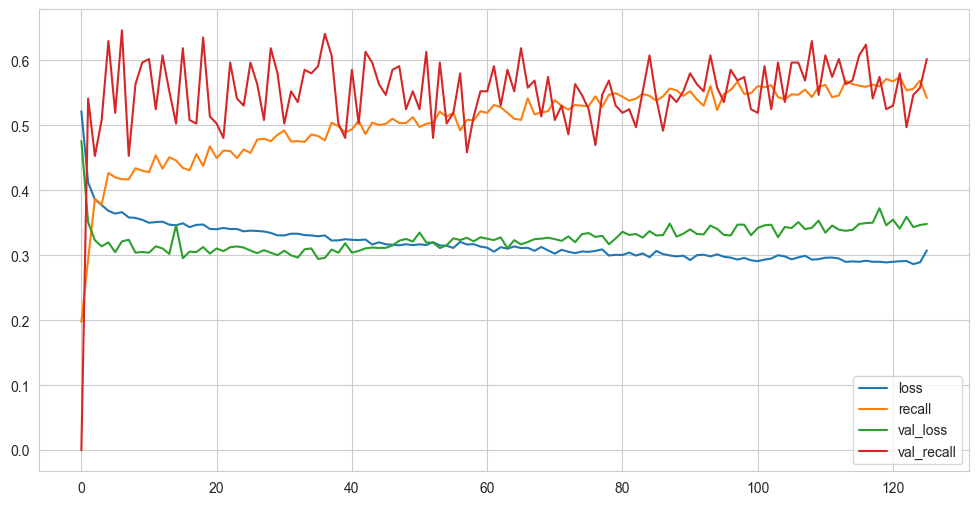

In [27]:
loss_df.plot();

In [28]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


32/32 [==============================] - 0s 2ms/step
[[755  41]
 [106  98]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       796
           1       0.71      0.48      0.57       204

    accuracy                           0.85      1000
   macro avg       0.79      0.71      0.74      1000
weighted avg       0.84      0.85      0.84      1000



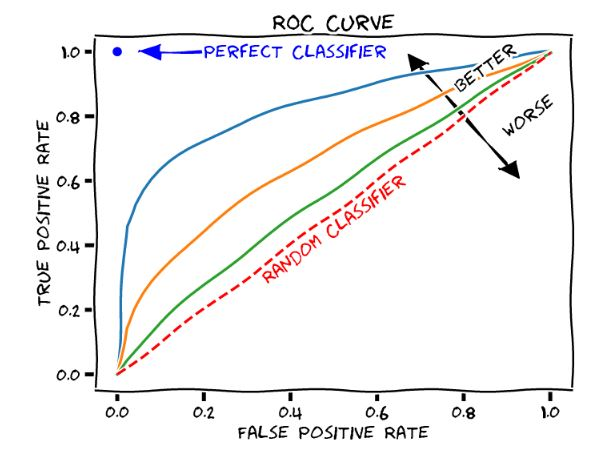

### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

32/32 [==============================] - 0s 2ms/step


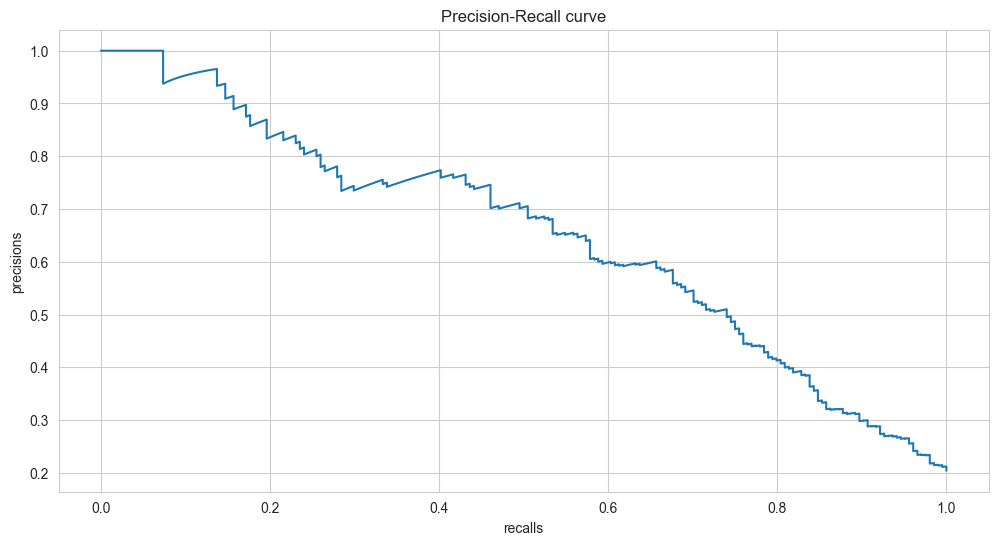

In [29]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show();
# roc curve, sınıflandırma performansını gösterir

In [30]:
average_precision_score(y_test, y_pred_proba)

0.6516161969904881

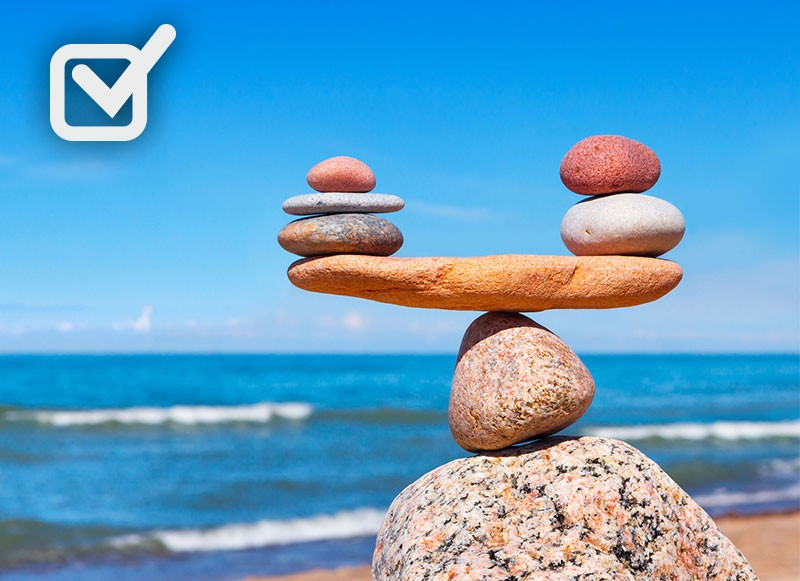

### with class_weigth

In [31]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(16, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.002)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

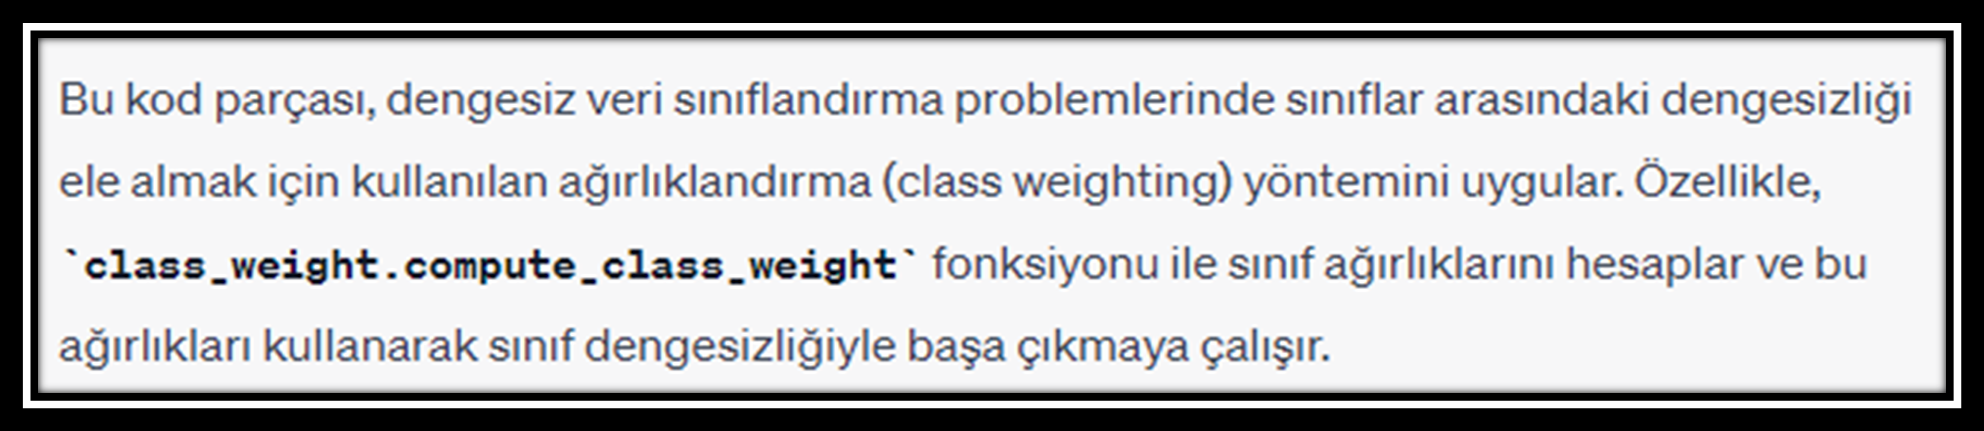

In [32]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

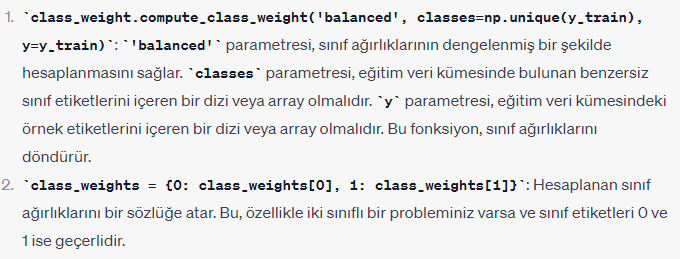

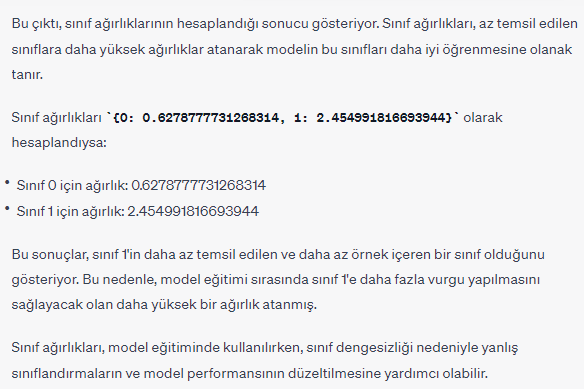

In [33]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=32,
          epochs=500,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/500
254/254 [==============================] - 3s 5ms/step - loss: 0.6558 - recall: 0.7215 - val_loss: 0.6787 - val_recall: 0.8287
Epoch 2/500
254/254 [==============================] - 1s 4ms/step - loss: 0.5736 - recall: 0.7264 - val_loss: 0.5515 - val_recall: 0.7956
Epoch 3/500
254/254 [==============================] - 1s 4ms/step - loss: 0.5320 - recall: 0.7458 - val_loss: 0.4110 - val_recall: 0.7569
Epoch 4/500
254/254 [==============================] - 1s 4ms/step - loss: 0.5177 - recall: 0.7548 - val_loss: 0.4848 - val_recall: 0.8232
Epoch 5/500
254/254 [==============================] - 1s 4ms/step - loss: 0.5010 - recall: 0.7506 - val_loss: 0.4798 - val_recall: 0.8177
Epoch 6/500
254/254 [==============================] - 1s 4ms/step - loss: 0.4956 - recall: 0.7669 - val_loss: 0.3857 - val_recall: 0.7238
Epoch 7/500
254/254 [==============================] - 1s 4ms/step - loss: 0.5015 - recall: 0.7452 - val_loss: 0.4805 - val_recall: 0.8453
Epoch 8/500
254/254 [======

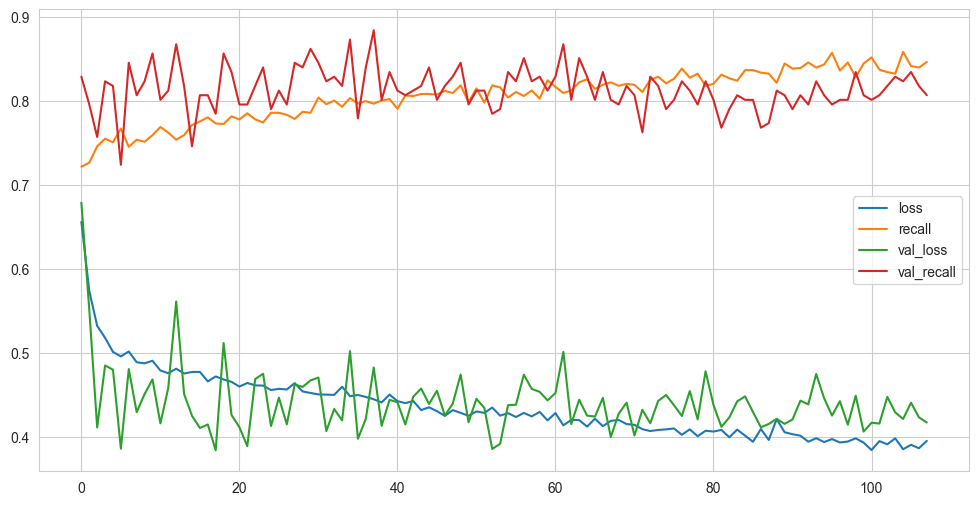

In [34]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [35]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[618 178]
 [ 53 151]]
              precision    recall  f1-score   support

           0       0.92      0.78      0.84       796
           1       0.46      0.74      0.57       204

    accuracy                           0.77      1000
   macro avg       0.69      0.76      0.70      1000
weighted avg       0.83      0.77      0.79      1000



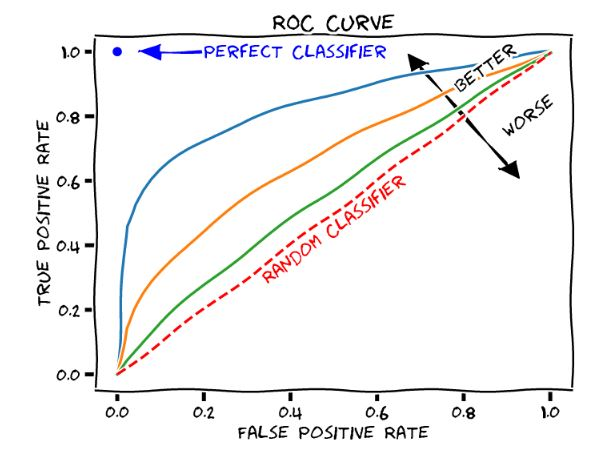

### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

32/32 [==============================] - 0s 2ms/step


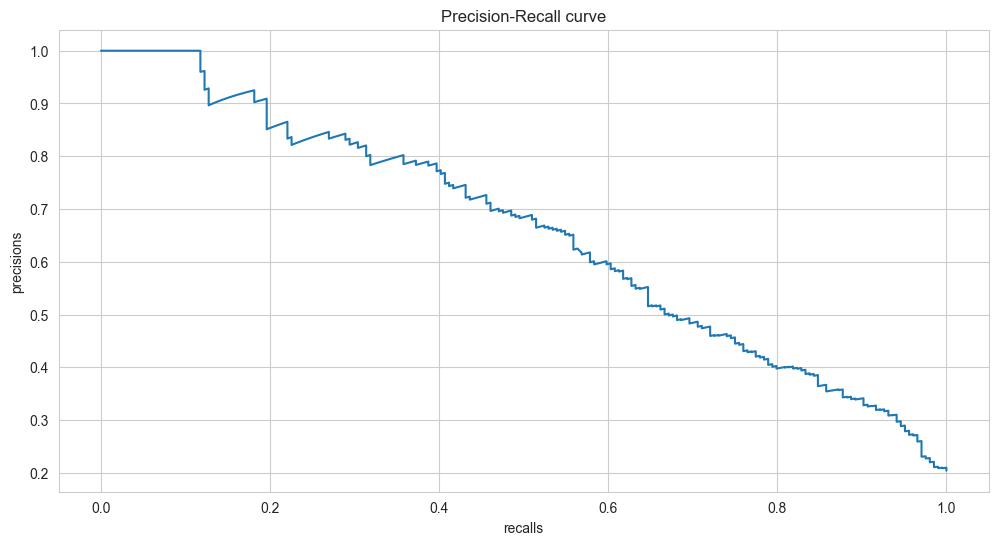

In [36]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show();
# roc curve, sınıflandırma performansını gösterir

In [37]:
average_precision_score(y_test, y_pred_proba)   #0.692983743350624

0.6559689165832254

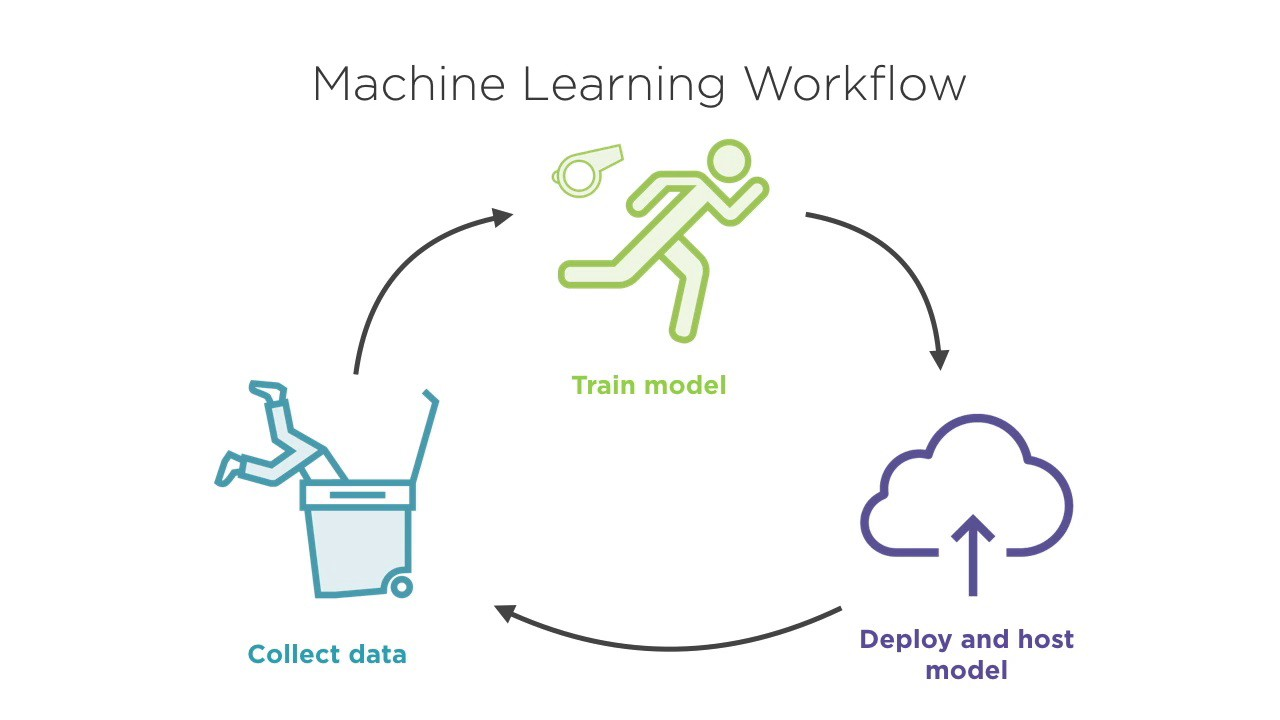

## Final Model and Model Deployment

In [38]:
import pickle

pickle.dump(scaler, open("scaler_churn", 'wb'))

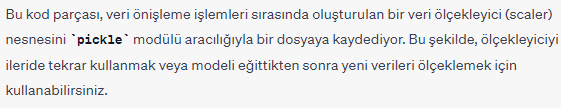

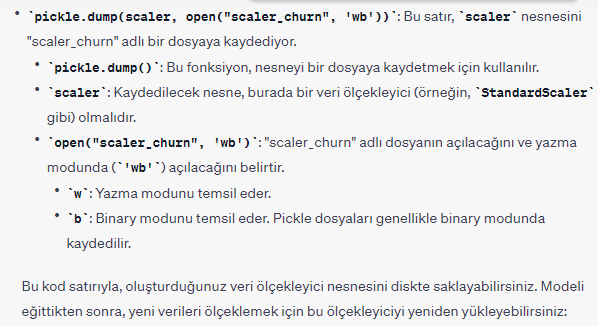

In [39]:
scaler = MinMaxScaler().fit(X)

In [40]:
X_scaled = scaler.transform(X)

In [41]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(16, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)

model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

In [42]:
model.fit(x=X_scaled,
          y=y,
          callbacks=[early_stop],
          batch_size=32,
          validation_split = 0.1,
          epochs=500,
          verbose=1,
          class_weight=class_weights)   

Epoch 1/500
282/282 [==============================] - 4s 5ms/step - loss: 0.6950 - recall: 0.5716 - val_loss: 0.6297 - val_recall: 0.4860
Epoch 2/500
282/282 [==============================] - 1s 4ms/step - loss: 0.6114 - recall: 0.6572 - val_loss: 0.5823 - val_recall: 0.6313
Epoch 3/500
282/282 [==============================] - 1s 4ms/step - loss: 0.5852 - recall: 0.6846 - val_loss: 0.5506 - val_recall: 0.6592
Epoch 4/500
282/282 [==============================] - 1s 4ms/step - loss: 0.5694 - recall: 0.7153 - val_loss: 0.5499 - val_recall: 0.7039
Epoch 5/500
282/282 [==============================] - 1s 4ms/step - loss: 0.5403 - recall: 0.7244 - val_loss: 0.5910 - val_recall: 0.7765
Epoch 6/500
282/282 [==============================] - 1s 4ms/step - loss: 0.5220 - recall: 0.7589 - val_loss: 0.5046 - val_recall: 0.6872
Epoch 7/500
282/282 [==============================] - 1s 4ms/step - loss: 0.5088 - recall: 0.7465 - val_loss: 0.4976 - val_recall: 0.7039
Epoch 8/500
282/282 [======

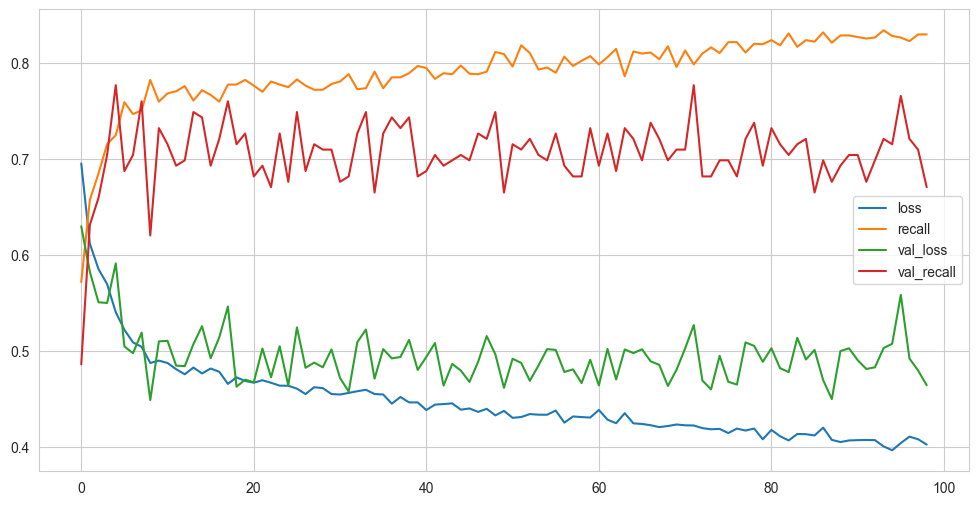

In [43]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [44]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.3517964482307434
recall :  0.8186274766921997


In [45]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[668 128]
 [ 37 167]]
              precision    recall  f1-score   support

           0       0.95      0.84      0.89       796
           1       0.57      0.82      0.67       204

    accuracy                           0.83      1000
   macro avg       0.76      0.83      0.78      1000
weighted avg       0.87      0.83      0.85      1000



In [46]:
model.save('model_churn.h5')

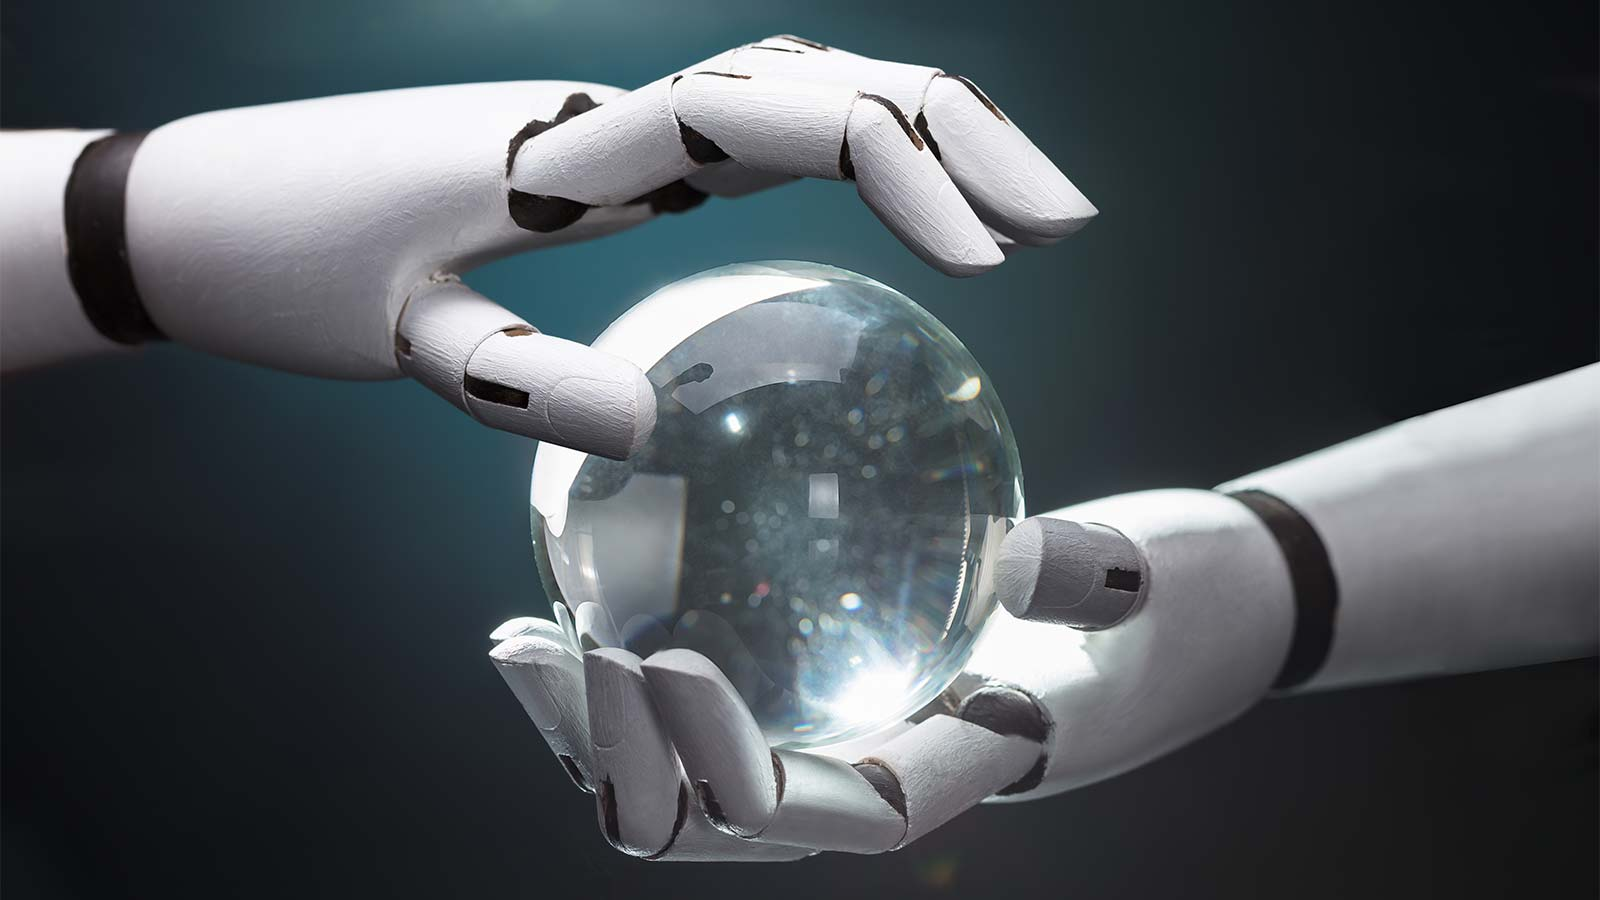

### Prediction

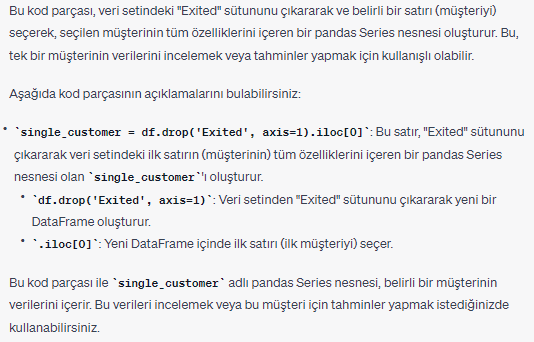

In [47]:
single_customer = df.drop('Exited', axis=1).iloc[0]
single_customer

CreditScore            619.000
Age                     42.000
Tenure                   2.000
Balance                  0.000
NumOfProducts            1.000
HasCrCard                1.000
IsActiveMember           1.000
EstimatedSalary     101348.880
Geography_Germany        0.000
Geography_Spain          0.000
Gender_Male              0.000
Name: 1, dtype: float64

In [49]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 11))
single_customer

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 0.        , 0.        ,
        0.        ]])

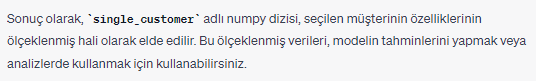

In [50]:
y_pred =(model.predict(single_customer) > 0.5).astype("int32")
y_pred

1/1 [==============================] - 0s 25ms/step


array([[1]])

In [51]:
df["Exited"].iloc[0]

1

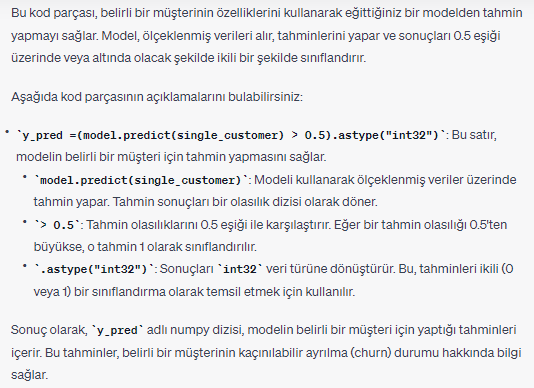

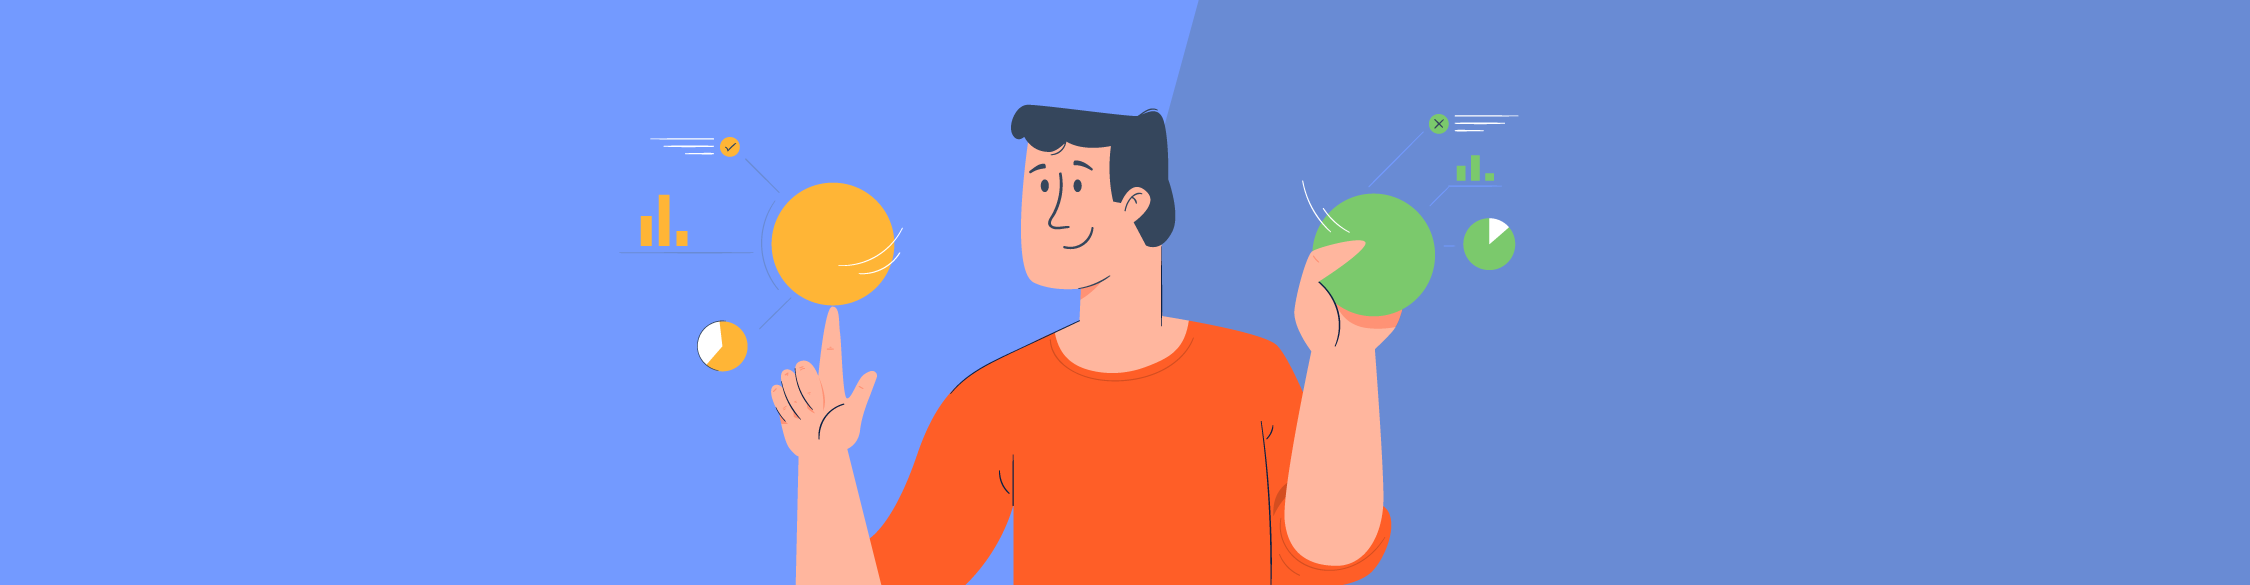

## Comparison with ML

### Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression ,LogisticRegressionCV

In [58]:
log_model=LogisticRegressionCV(class_weight='balanced')
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[558 238]
 [ 65 139]]
              precision    recall  f1-score   support

           0       0.90      0.70      0.79       796
           1       0.37      0.68      0.48       204

    accuracy                           0.70      1000
   macro avg       0.63      0.69      0.63      1000
weighted avg       0.79      0.70      0.72      1000



### Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier


In [55]:
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[764  32]
 [118  86]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.73      0.42      0.53       204

    accuracy                           0.85      1000
   macro avg       0.80      0.69      0.72      1000
weighted avg       0.84      0.85      0.83      1000



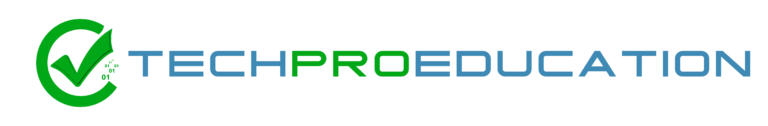